# Dataset

In [1]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2023-01-13 00:04:27--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.02s   

2023-01-13 00:04:28 (287 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [2]:
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to /tmp/pip-req-build-bn_aj7r6
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-bn_aj7r6
  Resolved https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to commit a5ecdbc7a7adb0b57cf414844a033de8833131bb
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/AlvaroJoseLopes/graph-walker to /tmp/pip-install-cghiwvlf/graph-walker_0e2bf0aaefb64309913936b2968726c1
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/graph-walker /tmp/pip-install-cghiwvlf/graph-walker_0e2bf0aaefb64309913936b2968726c1
  Resolved https://github.com/AlvaroJoseLopes/graph-walker to commit b8710bc3bb4daa8212fef1d9c12a1451e5dd56c6
  Installing build dependencies ... done
  Getting requirements to bui

In [3]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [4]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [5]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [6]:
df = df.sample(frac=0.3).reset_index(drop=True)
df

,file_name,text,class,label
0,earn.5120.txt,holly corp hoc nd qtr jan loss shr loss cts vs...,earn,2
1,acq.5883.txt,norstar shareholders to get fleet financial sh...,acq,0
2,earn.6191.txt,royal gold and silver corp st qtr net ended ja...,earn,2
3,earn.4311.txt,dunlop malaysian industries bhd six months to ...,earn,2
4,acq.8154.txt,horn hardart hor unit disposes restaurants hor...,acq,0
...,...,...,...,...
2297,acq.7034.txt,commonwealty realty crtyz bay bay end talks co...,acq,0
2298,earn.8434.txt,canterbury press inc year nov shr cts vs cts n...,earn,2
2299,money_fx.2829.txt,reagan says u s committed to louvre accord pre...,money,5
2300,acq.1966.txt,atcor atco o seeks buyers for consumer busines...,acq,0


In [7]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2bf314805ca52df0c3c076f39eb6f292ad72a3efa9c4b93c9f9692d37423f6ff
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Will be used as feature information later
embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [9]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,earn.5120.txt,holly corp hoc nd qtr jan loss shr loss cts vs...,earn,2,"[-0.38834155, -0.18786794, 0.16958204, 0.16781..."
1,acq.5883.txt,norstar shareholders to get fleet financial sh...,acq,0,"[-0.48174167, -0.12561595, 0.31819293, -0.3692..."
2,earn.6191.txt,royal gold and silver corp st qtr net ended ja...,earn,2,"[-0.28411016, -0.078496784, 0.39884833, 0.0196..."
3,earn.4311.txt,dunlop malaysian industries bhd six months to ...,earn,2,"[-0.1901907, -0.100981325, 0.04477968, 0.00816..."
4,acq.8154.txt,horn hardart hor unit disposes restaurants hor...,acq,0,"[-0.14989315, 0.039384164, 0.20394449, -0.3531..."
...,...,...,...,...,...
2297,acq.7034.txt,commonwealty realty crtyz bay bay end talks co...,acq,0,"[0.01920775, -0.28283563, 0.59597224, -0.11207..."
2298,earn.8434.txt,canterbury press inc year nov shr cts vs cts n...,earn,2,"[-0.19915904, -0.16917485, 0.27247864, -0.1305..."
2299,money_fx.2829.txt,reagan says u s committed to louvre accord pre...,money,5,"[0.1464561, -0.12888229, -0.27203003, -0.18147..."
2300,acq.1966.txt,atcor atco o seeks buyers for consumer busines...,acq,0,"[-0.21890481, -0.16212243, -0.32557464, 0.2513..."


# Building a example graph

In [10]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [11]:
import networkx as nx 
G = nx.Graph(A)

In [12]:
G.number_of_nodes()

2302

# Using the API

In [13]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
batch_size = 128
epochs = 5
lr = 0.0001

## Without Feature Information

In [14]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(G, batch_size=batch_size, epochs=epochs, lr=lr)

Random walks - T=0.09s
Walks shape: (115100, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/115100 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 2304) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Epoch 1/5
eh pra entrar aqui!!!
eh pra entrar aqui!!!
900/900 [==============================] - 8s 7ms/step - loss: 7.7299
Epoch 2/5
900/900 [==============================] - 6s 7ms/step - loss: 7.6917
Epoch 3/5
900/900 [==============================] - 6s 7ms/step - loss: 7.6645
Epoch 4/5
900/900 [==============================] - 6s 7ms/step - loss: 7.6465
Epoch 5/5
900/900 [==============================] - 6s 7ms/step - loss: 7.6346


In [15]:
node_embeddings = dwt.get_transductive_embeddings()
df_embed = pd.DataFrame.from_dict(node_embeddings, orient='index')

3597/3597 [==============================] - 9s 3ms/step


In [16]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.517673,-1.395384,1.014065,-0.170985,0.398254,0.536220,0.511941,0.592224,0.595859,0.789918,...,-1.507035,1.012419,0.516333,0.855491,-1.327222,0.899615,-1.051831,1.111615,-1.100228,0.982750
1,-1.037850,-1.510787,0.819076,-0.625461,0.774272,0.293087,0.717691,0.531203,0.456431,0.406802,...,-1.485823,1.022953,0.235870,1.193946,-1.127405,0.795773,-0.864430,1.065227,-0.915924,0.691507
2,-0.712683,-1.415563,0.923381,-0.366993,0.514724,0.550622,0.537266,0.639587,0.620974,0.656261,...,-1.479458,1.129718,0.534115,0.896912,-1.237330,0.838140,-0.976960,1.105019,-1.122660,0.947589
3,-0.954500,-1.562209,0.801416,-0.531334,0.675077,0.359312,0.736592,0.517528,0.520814,0.432847,...,-1.565263,1.079005,0.373619,1.102207,-1.070216,0.950084,-0.932609,1.027141,-0.980542,0.788560
4,-0.932056,-1.618027,0.821102,-0.599214,0.755802,0.365747,0.701190,0.616089,0.436384,0.382914,...,-1.532112,1.048660,0.361039,1.098551,-1.212346,0.928658,-0.924780,1.120692,-0.958287,0.720355


In [17]:
df_embed.shape

(2302, 32)

In [18]:
evaluate(df_embed, df.label.to_list())




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       196
           1       0.17      0.03      0.05        37
           2       0.59      0.74      0.66       363
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        21
           6       0.50      0.05      0.08        22
           7       0.00      0.00      0.00        28

    accuracy                           0.54       691
   macro avg       0.22      0.17      0.16       691
weighted avg       0.47      0.54      0.49       691



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

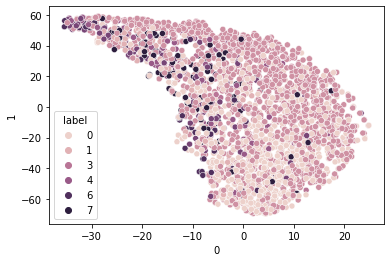

In [19]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = df.label.to_list()
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## With Feature Information

In [20]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(G, features=embeddings, batch_size=batch_size, epochs=epochs, lr=lr)

Random walks - T=0.09s
Walks shape: (115100, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/115100 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 2304) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Epoch 1/5
eh pra entrar aqui!!!
eh pra entrar aqui!!!
900/900 [==============================] - 9s 8ms/step - loss: 7.7248
Epoch 2/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6855
Epoch 3/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6582
Epoch 4/5
900/900 [==============================] - 7s 7ms/step - loss: 7.6403
Epoch 5/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6292


In [21]:
node_embeddings = dwt.get_transductive_embeddings()
df_embed = pd.DataFrame.from_dict(node_embeddings, orient='index')

3597/3597 [==============================] - 10s 3ms/step


In [22]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.002761,-1.284221,0.520397,-0.869822,0.273389,0.458376,-0.731200,0.909484,-0.678876,1.157167,...,-1.221743,0.725840,-0.568381,1.189687,-1.035022,0.793678,-0.767940,1.234600,-1.292000,0.976201
1,-0.337954,-1.200158,0.443836,-0.839558,0.710153,0.211538,-0.742696,0.661207,-0.529093,1.147584,...,-1.116576,0.854945,-0.627064,1.039711,-1.006947,0.529365,-0.963763,1.218990,-0.898594,1.120704
2,0.208445,-1.103853,0.940834,-0.918881,0.412316,0.335256,-0.741759,1.010006,-0.852530,0.981863,...,-1.402191,0.941277,-0.654292,1.113237,-1.158286,0.684766,-0.903713,1.032092,-1.279950,0.863613
3,-0.036180,-1.468887,0.512191,-0.799089,0.448594,0.390890,-0.792302,0.718454,-0.546662,0.885990,...,-0.984102,0.869681,-0.440909,1.061407,-0.881563,0.774472,-1.002285,0.974180,-1.177777,1.055745
4,-0.334864,-1.136742,0.360839,-0.937775,0.404294,0.046517,-0.657877,0.830223,-0.542265,1.142436,...,-1.054325,0.864899,-0.589020,1.002444,-1.191301,0.707662,-0.703351,1.209136,-1.093684,1.109252


In [23]:
evaluate(df_embed, df.label.to_list())




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.42      0.43      0.42       196
           1       0.00      0.00      0.00        37
           2       0.62      0.79      0.69       363
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.07      0.05      0.06        21
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        28

    accuracy                           0.54       691
   macro avg       0.14      0.16      0.15       691
weighted avg       0.44      0.54      0.49       691



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

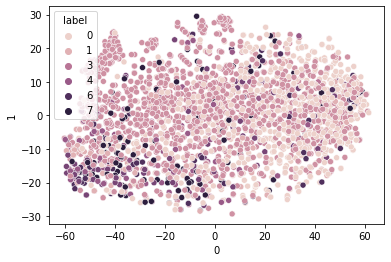

In [24]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = df.label.to_list()
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")